In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [3]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [4]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
#get our training labels 
labels = train['label'].values

In [6]:
# View the unique labels. 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

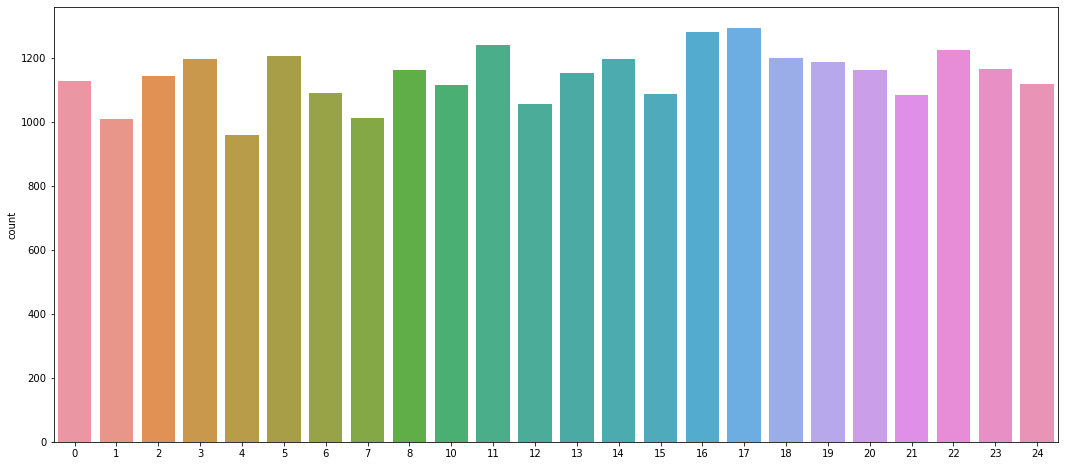

In [7]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [8]:
#Drop Training Labels from our training data so we can seperate it 
train.drop('label',axis = 1, inplace = True)

In [9]:
#extract the image data from each row in our csv, remember it's in a row of 784 columns

images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
# hot one encode our labels 

from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
#View our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


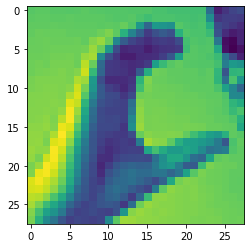

In [12]:
# Inspecing an image 

index = 2

print(labels[index])

plt.imshow(images[index].reshape(28,28))

In [13]:
# Using open cv to view 10 random images
import cv2
import numpy as np



for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()


In [14]:
#split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [15]:
#start loding our tensorflow modules and define out batch size ets 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 2


2023-10-16 13:55:56.441896: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 13:55:56.482869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 13:55:56.749303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 13:55:56.750625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 13:55:58.734497: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [16]:
#scale pur images 
x_train = x_train / 255
X_test = x_test / 255

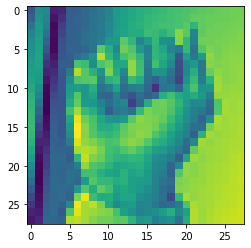

In [17]:
#reshape them into the size required by TF and Keras 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


plt.imshow(x_train[0].reshape(28,28))

In [18]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
# Compile our Model 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [21]:
#Train our Model 
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/2
151/151 [==============================] - 11s 62ms/step - loss: 2.5447 - accuracy: 0.2222 - val_loss: 107.8612 - val_accuracy: 0.4622
Epoch 2/2
151/151 [==============================] - 8s 51ms/step - loss: 1.1081 - accuracy: 0.6200 - val_loss: 62.0571 - val_accuracy: 0.7162


In [22]:
# Save our model

model.save("sign_mist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


/home/ujjwal/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


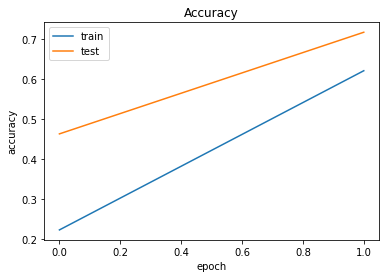

In [23]:
    #View our training history graphically
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','test'])

    plt.show()

In [24]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [25]:
# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [26]:
# Load the gesture recognizer model
model = load_model('mp_hand_gesture')

# Load class names
f = open('gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


['okay', 'peace', 'thumb', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile', '']


In [1]:
import cv2


cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    # Check if the frame was successfully read
    if frame is None:
        break

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)

    # Show the final output
    cv2.imshow("Output", frame)

    # Check for the 'q' key press and break the loop if detected
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


In [21]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])
        # Now you have the landmarks data in the 'landmarks' list

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

    # Display the frame with landmarks (optional)
    for landmark in landmarks:
        cv2.circle(frame, (landmark[0], landmark[1]), 5, (0, 0, 255), -1)

    cv2.imshow("Hand Gesture Recognition", frame)

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Show the prediction on the frame
            cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Error predicting gesture:", e)

    # Display the frame
    cv2.imshow("Final Frame", frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


2023-10-21 19:04:37.349010: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-21 19:04:37.360885: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 19:04:37.427323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 19:04:37.427889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 19:04:38.169940: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

1/1 [==============================] - 0s 23ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

1/1 [==============================] - 0s 23ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

In [23]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Define a known gesture for authentication
known_gesture = "Thumbs_UP"  # Modify this according to the specific gesture chosen for authentication

# Initialize the webcam
cap = cv2.VideoCapture(0)

authenticated = False  # Flag to check if the user is authenticated

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Check if the predicted gesture matches the known gesture for authentication
            if className == known_gesture:
                authenticated = True
                print("User authenticated!")  # You can replace this with your authentication logic
                break

        except Exception as e:
            print("Error predicting gesture:", e)

    # Display the frame
    cv2.imshow("Authentication Frame", frame)

    # Break the loop if the user is authenticated or the 'q' key is pressed
    if authenticated or cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 55ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 51ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 51ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 53ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 70ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

1/1 [==============================] - 0s 74ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 69ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

1/1 [==============================] - 0s 59ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

In [9]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Define known and invalid gestures for authentication
known_gesture = "peace"  # Modify this according to the specific gesture chosen for authentication

# Initialize the webcam
cap = cv2.VideoCapture(0)

authenticated = False  # Flag to check if the user is authenticated

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Check if the predicted gesture matches the known gesture for authentication
            if className == known_gesture:
                authenticated = True
                cv2.putText(frame, "User authenticated!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(frame, "Invalid User", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Error predicting gesture:", e)

    # Display the frame
    cv2.imshow("Authentication Frame", frame)

    # Break the loop if the user is authenticated or the 'q' key is pressed
    if authenticated or cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 52ms/step


In [7]:
import cv2
import numpy as np
import mediapipe as mp
import time
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Define known and invalid gestures for authentication
known_gesture = "peace"  # Modify this according to the specific gesture chosen for authentication

# Initialize the webcam
cap = cv2.VideoCapture(0)

authenticated = False  # Flag to check if the user is authenticated

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Check if the predicted gesture matches the known gesture for authentication
            if className == known_gesture:
                authenticated = True
                cv2.putText(frame, "User authenticated!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.imshow("Authentication Frame", frame)
                cv2.waitKey(2000)  # Display "User authenticated!" for 1 second
                break
            else:
                cv2.putText(frame, "Invalid User", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Error predicting gesture:", e)

    # Display the frame
    cv2.imshow("Authentication Frame", frame)

    # Break the loop if the user is authenticated or the 'q' key is pressed
    if authenticated or cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 52ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

1/1 [==============================] - 0s 57ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in 

1/1 [==============================] - 0s 53ms/step


In [14]:
import cv2
import numpy as np
import mediapipe as mp
import time
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Define known and invalid gestures for authentication
known_gesture = "peace"  # Modify this according to the specific gesture chosen for authentication

# Initialize the webcam
cap = cv2.VideoCapture(0)

authenticated = False  # Flag to check if the user is authenticated

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Check if the predicted gesture matches the known gesture for authentication
            if className == known_gesture:
                authenticated = True
                cv2.putText(frame, "User authenticated!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.imshow("Authentication Frame", frame)
                cv2.waitKey(1000)  # Display "User authenticated!" for 1 second
                loading_screen = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
                cv2.putText(loading_screen, "Loading...", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                for _ in range(3):
                    cv2.imshow("Authentication Frame", loading_screen)
                    cv2.waitKey(500)  # Display loading screen for 1.5 seconds
                break
            else:
                cv2.putText(frame, "Invalid User", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Error predicting gesture:", e)
            

    # Display the frame
    cv2.imshow("Authentication Frame", frame)

    # Break the loop if the user is authenticated or the 'q' key is pressed
    if authenticated or cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 62ms/step
Error predicting gesture: Graph execution error:

Detected at node 'sequential_2/dense_11/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/li

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import time
from tensorflow.keras.models import load_model

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Load the gesture recognizer model
try:
    model = load_model('mp_hand_gesture')
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Load class names
try:
    with open('gesture.names', 'r') as f:
        classNames = f.read().split('\n')
except Exception as e:
    print("Error loading class names:", e)
    exit()

# Define known and invalid gestures for authentication
known_gesture = "peace"  # Modify this according to the specific gesture chosen for authentication

# Initialize the webcam
cap = cv2.VideoCapture(0)

authenticated = False  # Flag to check if the user is authenticated

while True:
    # Read each frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error reading frame.")
        break

    # Convert frame to RGB
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # Initialize landmarks as an empty list
    landmarks = []

    # Check if hand landmarks are detected
    if result.multi_hand_landmarks:
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # Convert landmark positions to pixel coordinates
                lmx = int(lm.x * frame.shape[1])
                lmy = int(lm.y * frame.shape[0])
                landmarks.append([lmx, lmy])

    if landmarks:
        # Predict gesture using your model
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            # Check if the predicted gesture matches the known gesture for authentication
            if className == known_gesture:
                authenticated = True
                cv2.putText(frame, "User authenticated!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.imshow("Authentication Frame", frame)
                cv2.waitKey(1000)  # Display "User authenticated!" for 1 second
                loading_screen = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
                cv2.putText(loading_screen, "Loading...", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                for _ in range(3):
                    cv2.imshow("Authentication Frame", loading_screen)
                    cv2.waitKey(500)  # Display loading screen for 1.5 seconds
                cv2.putText(frame, "User Logged In!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.imshow("Authentication Frame", frame)
                cv2.waitKey(2000)  # Display "User Logged In!" for 2 seconds
                break
            else:
                cv2.putText(frame, "Invalid User", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Error predicting gesture:", e)

    # Display the frame
    cv2.imshow("Authentication Frame", frame)

    # Break the loop if the user is authenticated or the 'q' key is pressed
    if authenticated or cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and destroy all active windows

# ... (previous code remains the same)

authenticated = False  # Flag to check if the user is authenticated
loading_complete = False  # Flag to check if loading screen has been displayed

while True:
    # ... (previous code remains the same)

    if landmarks and not loading_complete:
        try:
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            className = classNames[classID]

            if className == known_gesture:
                authenticated = True
                cv2.putText(frame, "User authenticated!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.imshow("Authentication Frame", frame)
                cv2.waitKey(1000)  # Display "User authenticated!" for 1 second
                loading_screen = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
                cv2.putText(loading_screen, "Loading...", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                for _ in range(3):
                    cv2.imshow("Authentication Frame", loading_screen)
                    cv2.waitKey(500)  # Display loading screen for 1.5 seconds
                loading_complete = True
                break
            else:
                cv2.putText(frame, "Invalid User", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Error predicting gesture:", e)

    # ... (previous code remains the same)

# Show a different screen if the user is authenticated
if authenticated and loading_complete:
    cv2.destroyAllWindows()  # Close the previous window
    logged_in_frame = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
    cv2.putText(logged_in_frame, "User Logged In!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("User Logged In Frame", logged_in_frame)
    cv2.waitKey(2000)  # Display "User Logged In!" for 2 seconds
    cv2.destroyAllWindows()

# ... (rest of the code remains the same)


2023-10-21 23:33:47.334081: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-21 23:33:47.368262: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 23:33:47.633682: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 23:33:47.635299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 23:33:49.356257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 54ms/step
